In [34]:
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [35]:
%load_ext pycodestyle_magic

In [36]:
# Activate stile
%pycodestyle_on

In [37]:
# Read excel file from local folder
df = pd.read_excel("Dataset/Prod_Activos.xlsx", sheet_name="AUCA")
df.head()

,FECHA,ANACONDA,ARMADILLO,AUCA CENTRAL,AUCA SUR,AUCA SUR 1,CHONTA ESTE,CONONACO,CULEBRA,PITALALA,RUMIYACU,TORTUGA SUR,YUCA,YULEBRA,POTENCIA DE CONSUMO
0,2019-01-01,3131.88,3311.0,41498.73,42505.485,15475.362,2066.734,12056.55,5055.518,1584.912,10929.78,883.421,15519.21,8450.48,25441.000000
1,2019-01-02,3132.24,3308.0,41529.06,42700.752,15475.110,2066.699,12076.80,5053.269,1584.021,10619.68,883.398,15521.54,8451.82,25725.083333
2,2019-01-03,3131.76,3308.0,41545.22,42700.467,15613.250,2066.926,12076.82,5055.942,1585.078,10619.69,883.191,15518.76,8458.23,25220.166667
3,2019-01-04,3132.06,3308.0,41572.42,42703.937,15611.461,2066.676,12077.20,5055.229,1584.411,10629.09,883.030,15517.74,8459.05,24824.083333
4,2019-01-05,3033.50,3309.0,40774.43,42462.285,15605.455,2060.277,12058.97,5053.101,1585.879,10621.74,884.225,15605.88,9035.99,25598.958333


First than all, we might realize what data type we have, in order to do that we could use ```pandas.DataFrame.dtypes```

In [38]:
# Show all types data of each column
df.dtypes

FECHA                  datetime64[ns]
ANACONDA                      float64
ARMADILLO                     float64
AUCA CENTRAL                  float64
AUCA SUR                      float64
AUCA SUR 1                    float64
CHONTA ESTE                   float64
CONONACO                      float64
CULEBRA                       float64
PITALALA                      float64
RUMIYACU                      float64
TORTUGA SUR                   float64
YUCA                          float64
YULEBRA                       float64
POTENCIA DE CONSUMO           float64
dtype: object

As you can see all data are numerical continue (float64) because they represent oil production, except the colum "POTENCIA DE CONSUMO" represent consumption power, and the 'FECHA' column we have datetime type in the first colum.

To do a brief with descriptive statistic values we would use ```pandas.DataFrame.describe()```

In [39]:
df.describe().round(2)

,ANACONDA,ARMADILLO,AUCA CENTRAL,AUCA SUR,AUCA SUR 1,CHONTA ESTE,CONONACO,CULEBRA,PITALALA,RUMIYACU,TORTUGA SUR,YUCA,YULEBRA,POTENCIA DE CONSUMO
count,382.00,382.00,382.00,382.00,382.00,382.00,382.00,382.00,382.00,382.00,382.00,382.00,382.00,382.00
mean,2991.01,4908.28,38907.71,48181.00,15948.32,1944.79,12638.39,11168.50,1327.65,9599.90,608.67,16305.43,9123.91,24719.61
std,95.15,569.59,2274.34,3473.25,1113.71,166.03,1072.82,4558.18,161.52,786.52,84.68,1893.33,1338.27,1461.20
min,2806.83,3283.00,32476.88,33511.09,7783.33,1513.20,10005.67,4209.09,826.43,7387.94,528.84,8220.04,3605.83,19226.83
25%,2914.68,4508.00,37332.76,45636.85,15442.17,1862.74,11709.23,7590.22,1196.32,9018.50,561.54,15298.13,8138.34,23685.47
50%,2971.16,4896.00,39143.70,48902.22,15900.64,2040.26,12772.07,12181.96,1231.81,9559.90,576.88,16643.03,9288.86,24602.65
75%,3086.95,5300.90,40857.56,50748.19,16507.98,2081.04,13488.89,15715.44,1470.17,10148.21,607.65,17365.67,10407.27,25814.50
max,3139.96,6129.00,42435.14,55073.80,18015.62,2128.48,14709.20,18911.28,1943.66,11586.52,884.22,20951.79,11748.35,29248.17


In order to be sure we can show the numbers of data which have NAN values or NULL as well.

In [40]:
Nan_data = df.isna().sum()
Null_data = df.isnull().sum()
pd.DataFrame([df.columns.values, Nan_data.tolist(), Null_data.tolist(
    )]).T.rename(columns={0: "Feature", 1: "Nan", 2: "Null"})

,Feature,Nan,Null
0,FECHA,0,0
1,ANACONDA,0,0
2,ARMADILLO,0,0
3,AUCA CENTRAL,0,0
4,AUCA SUR,0,0
5,AUCA SUR 1,0,0
6,CHONTA ESTE,0,0
7,CONONACO,0,0
8,CULEBRA,0,0
9,PITALALA,0,0


Owing to the fact that we have a oil production history we can show them in line plot, specificly in a Spaghetti Plot.

In [41]:
def Spaghetti_plot(df_date=df['FECHA'],  df=df):
    # Change the style of plot
    plt.style.use('seaborn-darkgrid')
    # Create a color palette
    palette = plt.get_cmap('Set1')

    # Plot multiple lines
    num = 0
    for column in df:
        num += 1
        plt.plot(df_date, df[column], marker='', color=palette(
            num), linewidth=1, alpha=0.9, label=column)

    # Add legend
    plt.legend(loc=2, ncol=2)

    # Add titles
    plt.title("Oil Production History", loc='left',
              fontsize=15, fontweight=0, color='orange')
    plt.xlabel("Date")
    plt.ylabel("BOPD")
    plt.rcParams["figure.figsize"] = (15, 8)
    # Show the graph
    plt.show()

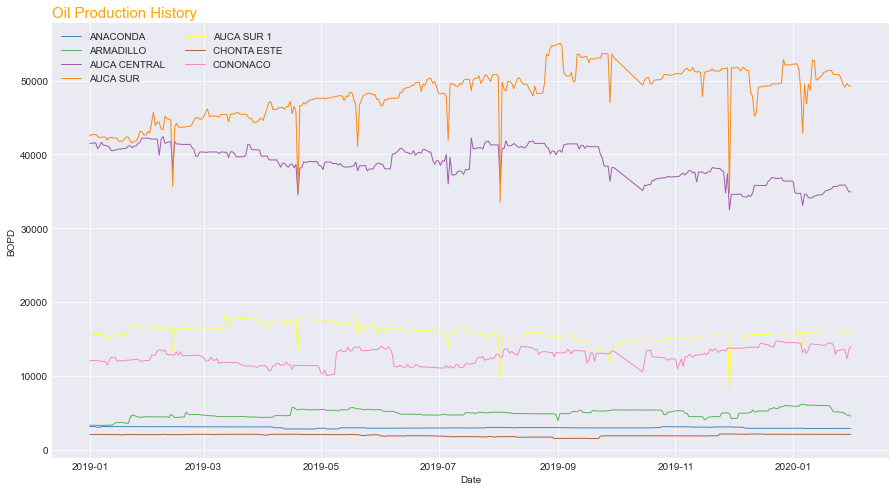

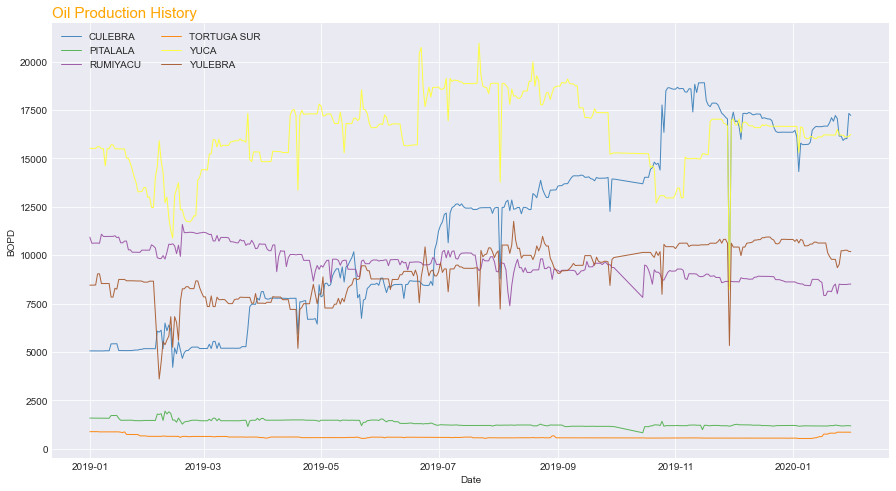

In [42]:
# determination of half of the columns
half_len = (len(df[1:-1].columns)/2 + .5 if len(
    df[1:-1].columns) % 2 != 0 else len(df[1:-1].columns)/2)

# to make better graphic representation, we split the dataframe just
# in case we have more than 9 columns
if len(df[1:-1].columns) >= 9:
    Spaghetti_plot(df['FECHA'], df.iloc[:, 1:int(half_len)])
    Spaghetti_plot(df['FECHA'], df.iloc[:, int(half_len):-1])
else:
    Spaghetti_plot(df['FECHA'], df.iloc[:, 1:-1])

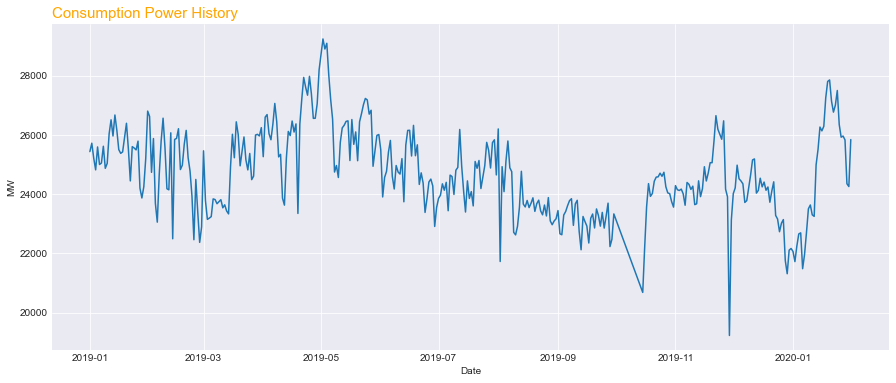

In [46]:
# Consumption Power History Plot
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(df["FECHA"], df["POTENCIA DE CONSUMO"])
ax.set_title('Consumption Power History', loc='left',
             fontsize=15, fontweight=0, color='orange')
ax.set_xlabel("Date")
ax.set_ylabel("MW")
plt.show()

In [44]:
# # using matplotlib to make proction oil plots
# fig, ax = plt.subplots(df.columns.__len__() - 2, 1, sharex=True,
#                        figsize=(10, 35))
# n = 0
# for name in df.columns[1:-1]:
#     ax[n].plot(df["FECHA"], df[name])
#     ax[n].set_title(name)
#     ax[n].set_xlabel("Date")
#     ax[n].set_ylabel("BOPD")
#     fig.autofmt_xdate()     # change date label inclination
#     n = n + 1